# Timeseries analysis with Facebook Prophet
https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a

In [23]:
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt

#
# build 6 time series groups for testing, called: a, b, c, d, e, f
#

num_samples = 61
group_size = 10

#
# create the main time series for each group
#

x = np.linspace(0, 5, num_samples)
scale = 4

a = scale * np.sin(x)
b = scale * (np.cos(1+x*3) + np.linspace(0, 1, num_samples))
c = scale * (np.sin(2+x*6) + np.linspace(0, -1, num_samples))
d = scale * (np.cos(3+x*9) + np.linspace(0, 4, num_samples))
e = scale * (np.sin(4+x*12) + np.linspace(0, -4, num_samples))
f = scale * np.cos(x)

#
# from each main series build 'group_size' series
#

timeSeries = pd.DataFrame()
ax = None
for arr in [a,b,c,d,e,f]:
    arr = arr + np.random.rand(group_size, num_samples) + np.random.randn(group_size, 1)
    df = pd.DataFrame(arr)
    timeSeries = timeSeries.append(df)
    

print(timeSeries.head())


         0         1         2         3         4         5         6   \
0  1.803927  1.923717  2.138027  2.794426  3.048515  3.189375  3.853535   
1  1.790159  1.954594  2.508803  3.278435  2.952208  3.823194  4.004882   
2  0.062091  0.514647  0.561092  1.534657  1.556061  1.544518  2.109024   
3 -0.074387 -0.129069  0.522825  1.366243  1.615378  1.859689  1.927761   
4  0.948084  1.766856  2.005553  2.461431  2.502598  2.772009  3.234593   

         7         8         9   ...        51        52        53        54  \
0  3.973920  3.988490  4.659976  ... -1.836519 -2.503424 -2.669710 -2.604119   
1  4.271763  4.255697  4.484672  ... -1.443171 -1.957599 -2.485553 -2.457262   
2  2.882758  2.492327  2.884265  ... -3.456442 -2.956967 -3.226185 -3.461044   
3  2.300485  2.044722  2.696472  ... -3.785787 -3.493401 -4.076319 -3.810313   
4  3.878405  3.982330  4.224730  ... -2.388445 -2.134499 -2.152606 -2.999419   

         55        56        57        58        59        60  
0 -1

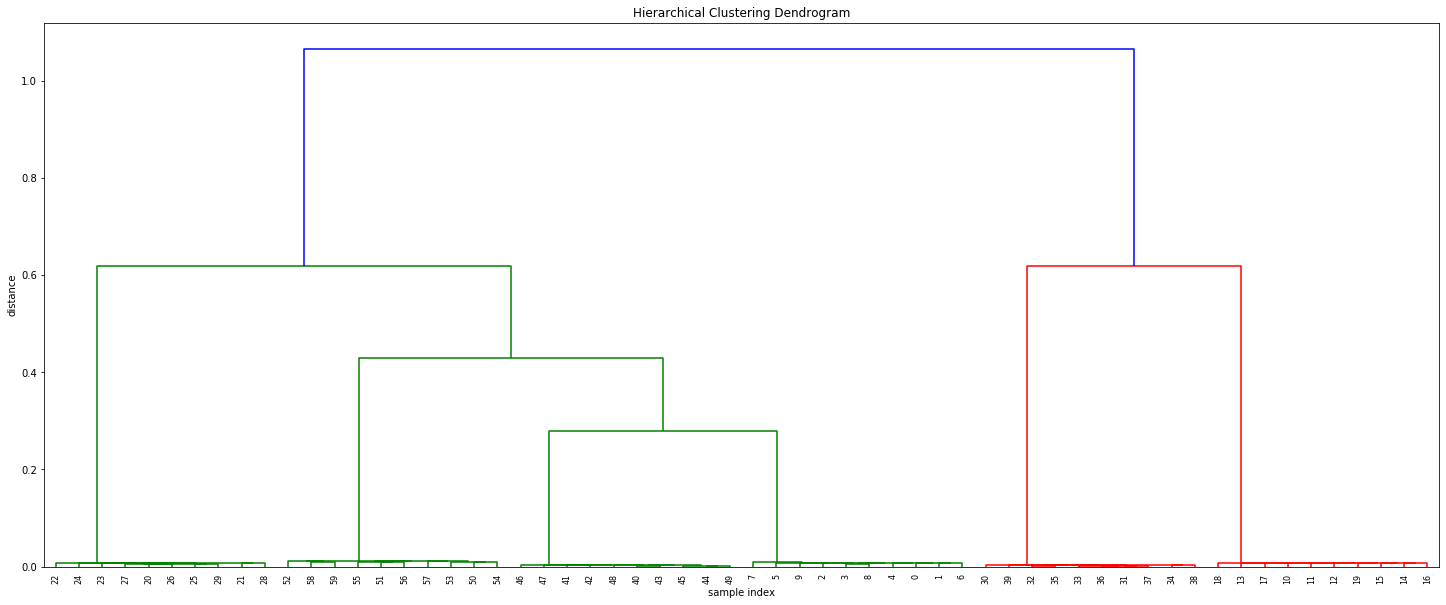

In [24]:
# Do the clustering
Z = hac.linkage(timeSeries, method='single', metric='correlation')

# Plot dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

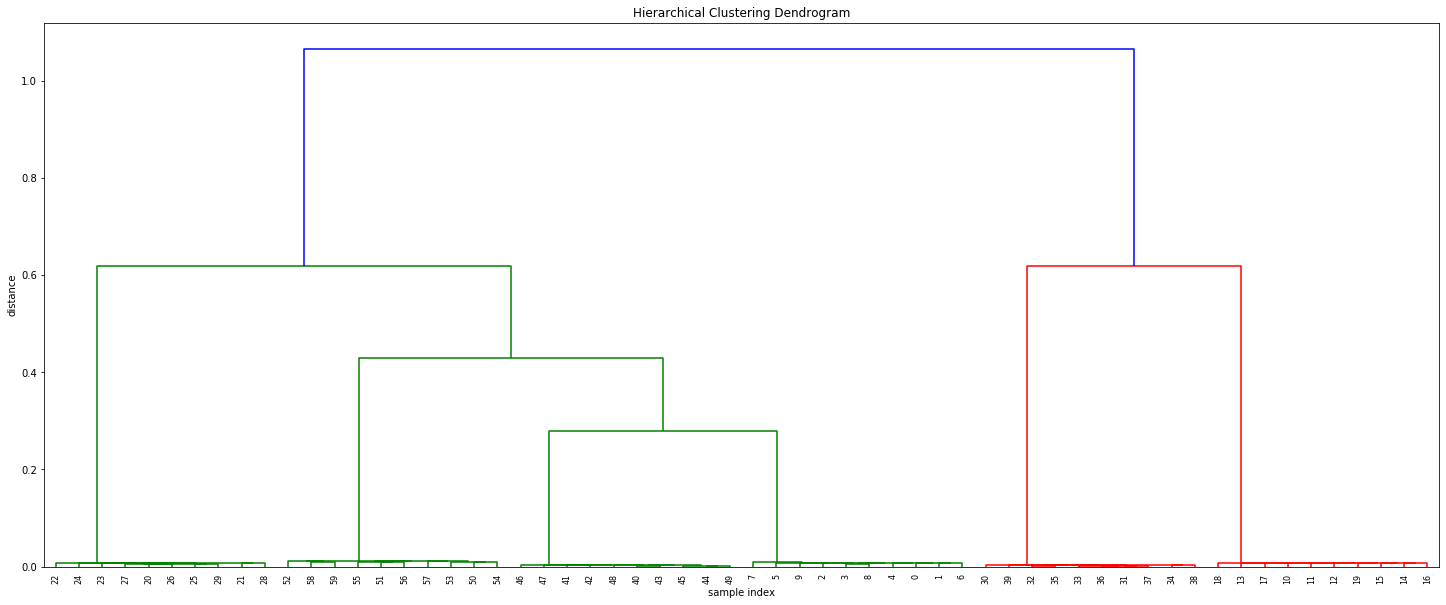

In [25]:
def my_metric(x, y):
    r = stats.pearsonr(x, y)[0]
    return 1 - r # correlation to distance: range 0 to 2

# Do the clustering    
Z = hac.linkage(timeSeries,  method='single', metric=my_metric)

# Plot dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [26]:
from scipy.cluster.hierarchy import fcluster

def print_clusters(timeSeries, Z, k, plot=False):
    # k Number of clusters I'd like to extract
    results = fcluster(Z, k, criterion='maxclust')

    # check the results
    s = pd.Series(results)
    clusters = s.unique()

    for c in clusters:
        cluster_indeces = s[s==c].index
        print("Cluster %d number of entries %d" % (c, len(cluster_indeces)))
        if plot:
            timeSeries.T.iloc[:,cluster_indeces].plot()
            plt.show()

print_clusters(timeSeries, Z, 6, plot=False)

Cluster 4 number of entries 10
Cluster 6 number of entries 10
Cluster 1 number of entries 10
Cluster 5 number of entries 10
Cluster 3 number of entries 10
Cluster 2 number of entries 10


https://alpynepyano.github.io/healthyNumerics/posts/time_series_clustering_with_python.html

In [29]:
import math
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def generate_data(nT,nC,mG,A,sg,eg):
    timeSeries = pd.DataFrame()
    basicSeries = pd.DataFrame()
    β = 0.5*np.pi
    ω = 2*np.pi/nT
    t = np.linspace(0,nT,nT)
    for ic,c in enumerate(np.arange(nC)):
        slope = sg*(-(nC-1)/2 + c)
        s = A * (-1**c -np.exp(t*eg))*np.sin(t*ω*(c+1) + c*β) + t*ω*slope 
        basicSeries[ic] = s
        sr = np.outer(np.ones_like(mG),s)
        sr = sr + 1*np.random.rand(mG,nT) + 1.0*np.random.randn(mG,1)
        timeSeries = timeSeries.append(pd.DataFrame(sr))
    return basicSeries, timeSeries

def plot_basicSeries(basicSeries):
    with plt.style.context('seaborn'):      # 'fivethirtyeight'      
         fig = plt.figure(figsize=(20,8)) ;       
         ax1 = fig.add_subplot(111);
         plt.title('Basice patterns to generate Longitudinal data',fontsize=25, fontweight='bold')
         plt.xlabel('Time', fontsize=15, fontweight='bold')
         plt.ylabel('Signal of the observed feature', fontsize=15, fontweight='bold')
         plt.plot(basicSeries, lw=10, alpha = 1.8)

def plot_timeSeries(timeSeries):
    with plt.style.context('seaborn'):      # 'fivethirtyeight'      
         fig = plt.figure(figsize=(20,8)) ;       
         ax1 = fig.add_subplot(111);
         plt.title('Longitudinal data',fontsize=25, fontweight='bold')
         plt.xlabel('Time', fontsize=15, fontweight='bold')
         plt.ylabel('Signal of the observed feature', fontsize=15, fontweight='bold')
         plt.plot(timeSeries.T)
         #ax1 = sns.tsplot(ax=ax1, data=timeSeries.values, ci=[68, 95])

def plot_dendogram(Z):
    with plt.style.context('fivethirtyeight' ): 
         plt.figure(figsize=(15, 5))
         plt.title('Dendrogram of time series clustering',fontsize=25, fontweight='bold')
         plt.xlabel('sample index', fontsize=25, fontweight='bold')
         plt.ylabel('distance', fontsize=25, fontweight='bold')
         hac.dendrogram( Z, leaf_rotation=90.,    # rotates the x axis labels
                            leaf_font_size=15., ) # font size for the x axis labels
         plt.show()

def plot_results(timeSeries, D, cut_off_level):
    result = pd.Series(hac.fcluster(D, cut_off_level, criterion='maxclust'))
    clusters = result.unique()       
    figX = 20; figY = 15
    fig = plt.subplots(figsize=(figX, figY))   
    mimg = math.ceil(cut_off_level/2.0)
    gs = gridspec.GridSpec(mimg,2, width_ratios=[1,1])   
    for ipic, c in enumerate(clusters):
        cluster_index = result[result==c].index
        print(ipic, "Cluster number %d has %d elements" % (c, len(cluster_index)))
        ax1 = plt.subplot(gs[ipic])
        ax1.plot(timeSeries.T.iloc[:,cluster_index])
        ax1.set_title(('Cluster number '+str(c)), fontsize=15, fontweight='bold')      
    plt.show()

def plot_basic_cluster(X):
    with plt.style.context('fivethirtyeight' ): 
         plt.figure(figsize=(17,3))
         D1 = hac.linkage(X, method='ward', metric='euclidean')
         dn1= hac.dendrogram(D1)
         plt.title("Clustering: method='ward', metric='euclidean'")

         plt.figure(figsize=(17, 3))
         D2 = hac.linkage(X, method='single', metric='euclidean')
         dn2= hac.dendrogram(D2)
         plt.title("Clustering: method='single', metric='euclidean'")
         plt.show()

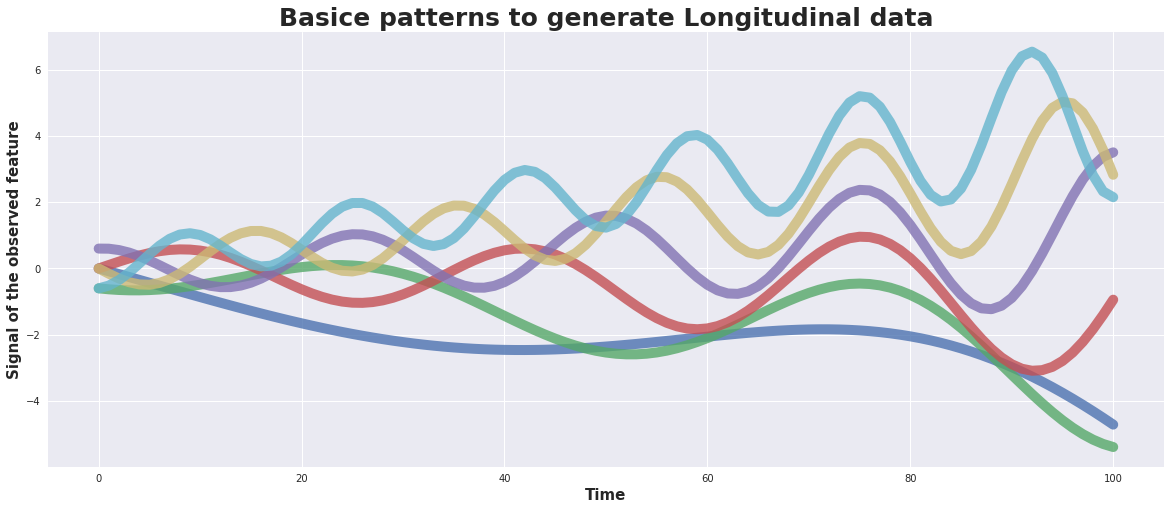

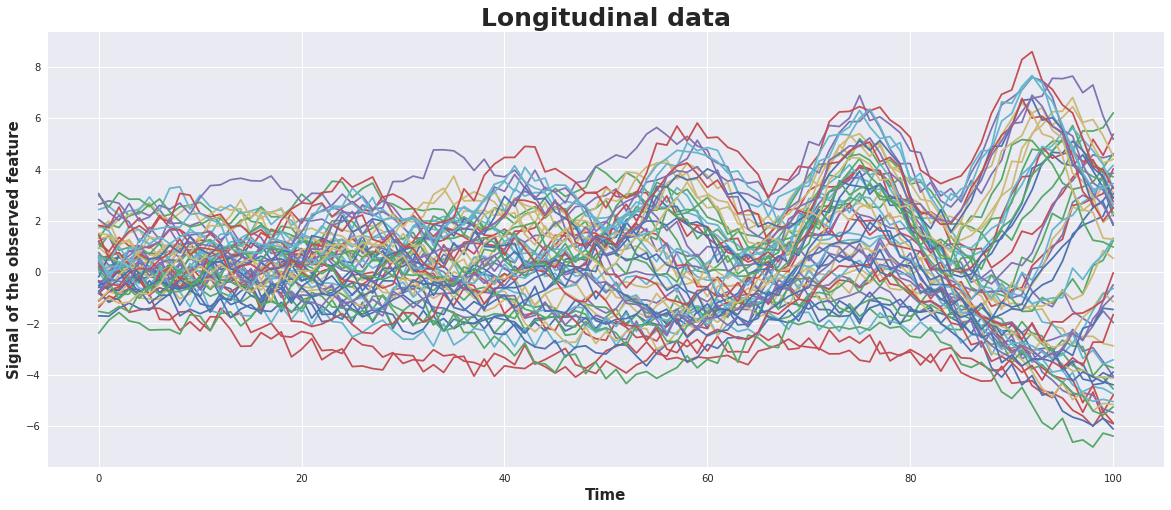

In [30]:
#---- number of time series
nT = 101  # number of observational point in a time series
nC = 6    # number of charakteristic  signal groups
mG = 10   # number of time series in a charakteristic signal group

#---- control parameters for data generation
Am = 0.3; # amplitude of the signal
sg = 0.3  # rel. weight of the slope
eg = 0.02 # rel. weight of the damping

#---- generate the data
basicSeries,timeSeries = generate_data(nT,nC,mG,Am,sg,eg)
plot_basicSeries(basicSeries)
plot_timeSeries(timeSeries)

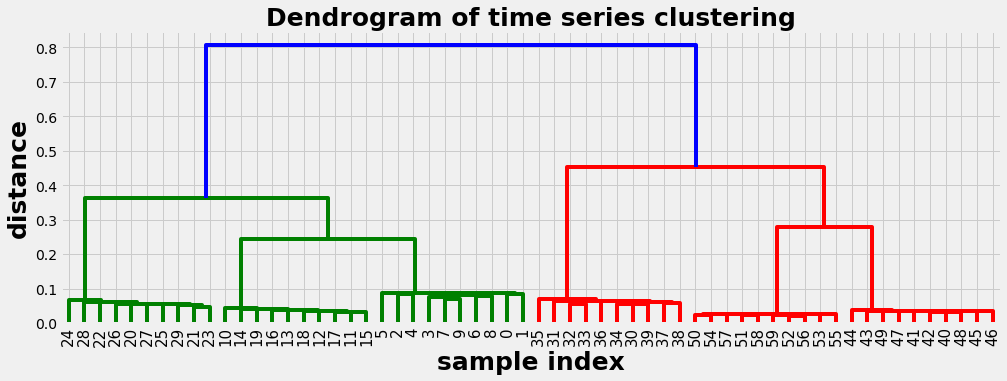

0 Cluster number 3 has 10 elements
1 Cluster number 2 has 10 elements
2 Cluster number 1 has 10 elements
3 Cluster number 4 has 10 elements
4 Cluster number 6 has 10 elements
5 Cluster number 5 has 10 elements


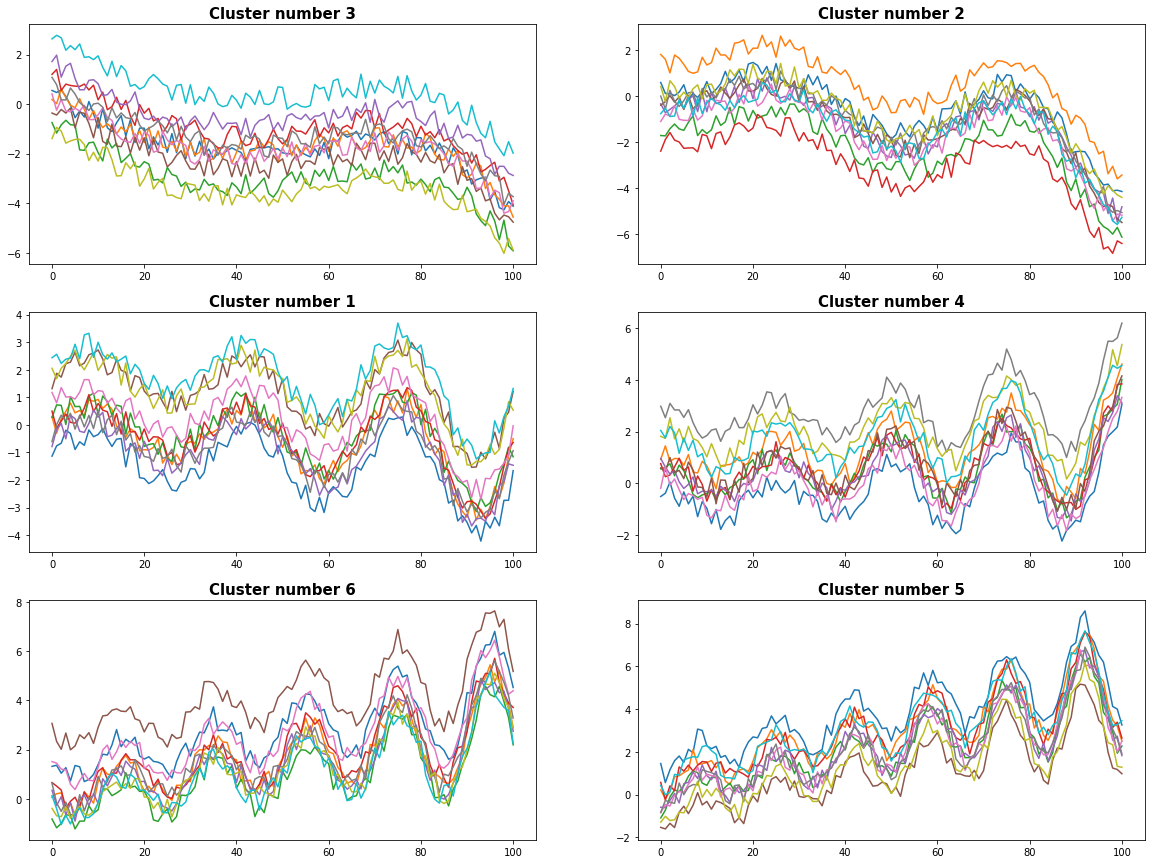

In [31]:
#--- Here we use spearman correlation as distance metric
def myMetric(x, y):
    r = stats.pearsonr(x, y)[0]
    return 1 - r 

#--- run the clustering    
D = hac.linkage(timeSeries, method='single', metric=myMetric)
plot_dendogram(D)

#---- evaluate the dendogram
cut_off_level = 6   # level where to cut off the dendogram
plot_results(timeSeries, D, cut_off_level)

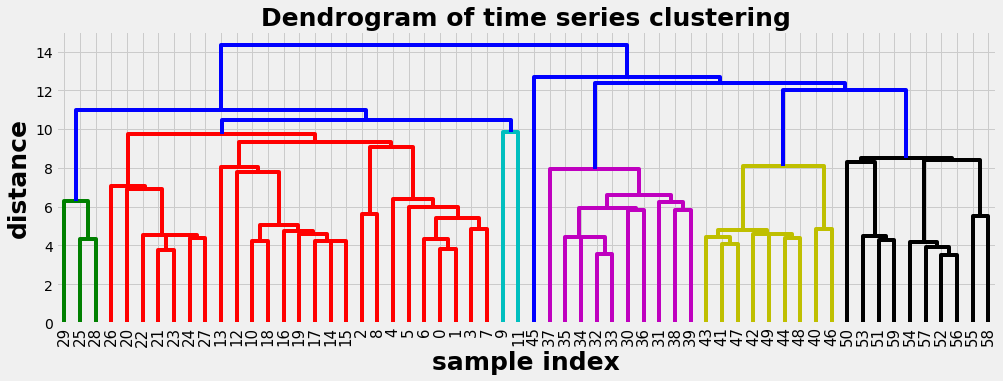

0 Cluster number 2 has 27 elements
1 Cluster number 1 has 3 elements
2 Cluster number 3 has 10 elements
3 Cluster number 4 has 9 elements
4 Cluster number 6 has 1 elements
5 Cluster number 5 has 10 elements


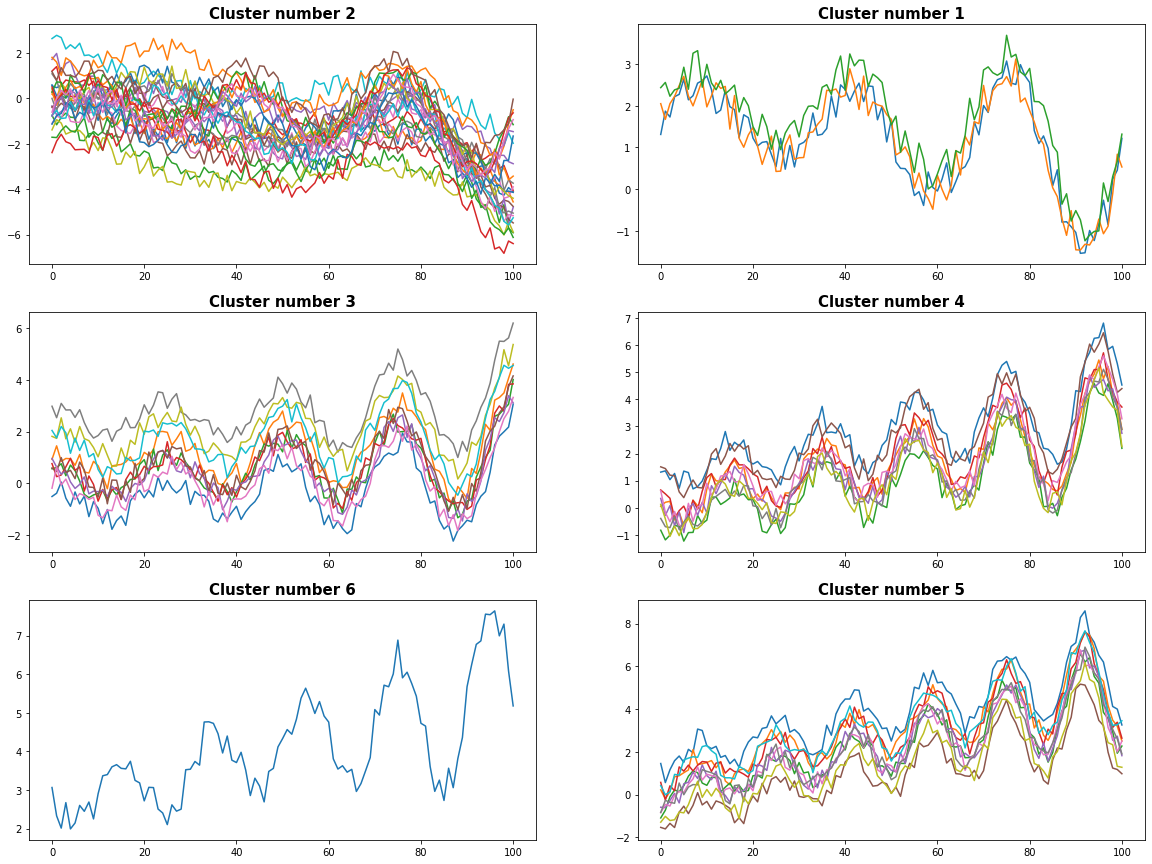

In [32]:
#--- run the clustering
#D = hac.linkage(timeSeries, method='single', metric='correlation')
D = hac.linkage(timeSeries, method='single', metric='euclidean')
plot_dendogram(D)

#---- evaluate the dendogram
cut_off_level = 6   # level where to cut off the dendogram
plot_results(timeSeries, D, cut_off_level)

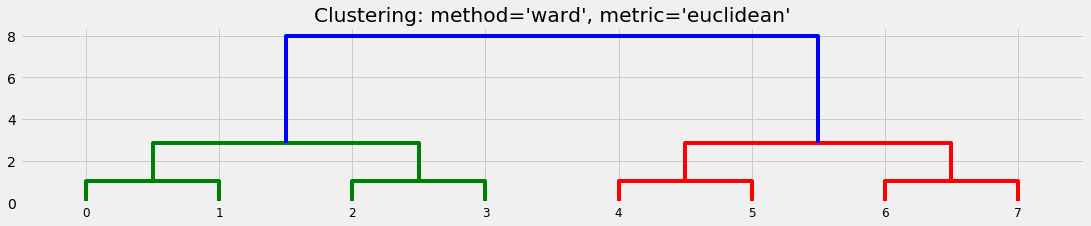

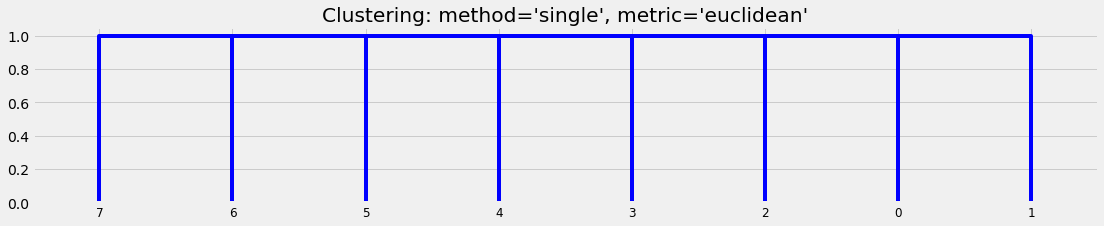

In [33]:
X = np.array([])
X = [[i] for i in [0, 1, 2, 3, 4, 5, 6, 7]]
plot_basic_cluster(X)

https://python-timeseries.readthedocs.io/en/latest/model.html

https://towardsdatascience.com/playing-with-time-series-data-in-python-959e2485bff8

https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

# Agglomerative Clustering

Agglomerative Clustering is a type of hierarchical clustering technique used to build clusters from bottom up. Divisive Clustering is the opposite method of building clusters from top down, which is not available in sklearn. This technique allows direct timeseries windows to be clustered directly.

There are 4 steps to this clustering.

## 1) Model the Data

In [34]:
from scipy.cluster.hierarchy import linkage, dendrogram
Z = linkage(df, method='ward', metric='euclidean')

Two inputs are crucial the model:
method which refers to the method of calculating the distance between each clusters
metric the algorithm to calculate distance between each datapoint

# 2) Plot the Dendrogram

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [60.0, 60.0, 82.5, 82.5],
  [32.5, 32.5, 71.25, 71.25],
  [10.0, 10.0, 51.875, 51.875]],
 'dcoord': [[0.0, 3.4070633495495457, 3.4070633495495457, 0.0],
  [0.0, 3.5347444927797236, 3.5347444927797236, 0.0],
  [0.0, 4.414904966157348, 4.414904966157348, 3.5347444927797236],
  [0.0, 3.41140104175375, 3.41140104175375, 0.0],
  [0.0, 2.9898676557406296, 2.9898676557406296, 0.0],
  [0.0, 3.9718711930544304, 3.9718711930544304, 2.9898676557406296],
  [3.41140104175375, 7.149524450589279, 7.149524450589279, 3.9718711930544304],
  [4.414904966157348,
   14.865213635889953,
   14.865213635889953,
   7.149524450589279],
  [3.4070633495495457,
   23.70256906020346,
   23.70256906020346,
   14.865213635889953]],
 'ivl': ['2', '8', '3', '6', '7', '1', '9', '5', '0', '4'],
 'leaves': [2, 8, 3, 6, 7, 1, 9, 5, 0, 4],
 'color_l

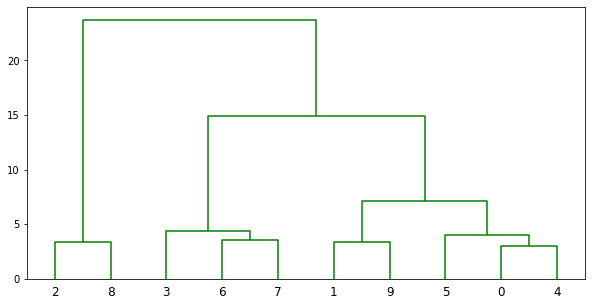

In [35]:
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z, color_threshold=4000)

If we have a lot of datapoints, the plotted dendrogram will look overwhelmingly cluttered, like below. However, setting the color_threshold helps to classify the dendrogram better by color.


The dendrogram can be further enhanced by
adding title and axis labels
adding grids
trimming the bottom branches based on max. no. of clusters to display
labelling each cluster split distance
a horizontal line to investigate where would be an appropriate cutoff point


TypeError: 'bool' object is not subscriptable

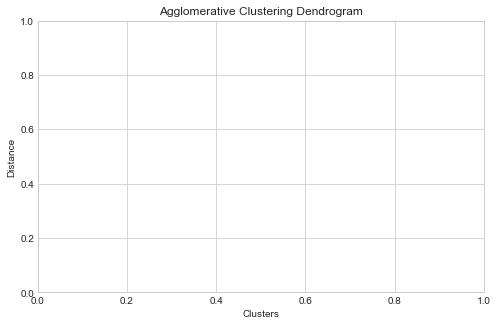

In [36]:
from scipy.cluster.hierarchy import linkage, dendrogram

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8, 5))
plt.title('Agglomerative Clustering Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Distance')

# cluster
Z = linkage(df, method='ward', metric='euclidean')

# plot dendrogram
ddata = dendrogram(Z, orientation='top',
                    truncate_mode='lastp', p=5,
                    labels=True, get_leaves=True,
                    show_leaf_counts=True,
                    show_contracted=True)

# plot cluster points & distance labels
limit = 4
for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
    x = sum(i[1:3])/2
    y = d[1]
    if y > limit:
        plt.plot(x, y, 'o', c=c, markeredgewidth=0)
        plt.annotate(int(y), (x, y), xytext=(0, -5),
                    textcoords='offset points',
                    va='top', ha='center', fontsize=9)

# plot distance
line = 1500
plt.axhline(y=line, c='black', linestyle='--');

The labels in brackets is the number of datapoints that are clustered under each branch.

# 3) Assign Cluster Labels
Finally, we assign a fixed cluster label to each datapoint, aka flattening the clusters.


In [37]:
from scipy.cluster.hierarchy import fcluster

# distance cutoff
distance_threshold = 4000
y = fcluster(Z, distance_threshold, criterion='distance')

# max no. of clusters
max_clusters = 5
y = fcluster(Z, max_clusters, criterion='maxclust')

This can be done via various criteria, e.g., using a cut off distance, or maximum no. of clusters.

# 4) Plot Timeseries by Cluster
If the dataset is in timseries windows, we can plot all the individual timeseries plots within their assigned clusters beside the dendrogram. Download the code from my github repository.


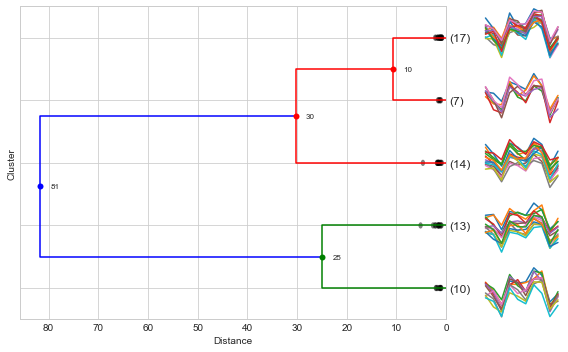

In [38]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


def add_distance(ddata, dist_threshold=None, fontsize=8):
    '''
    Description
    ------------
    Plot cluster points & distance labels in dendrogram

    Arguments
    ---------
    ddata: scipy dendrogram output
    dist_threshold: distance threshold where label will be drawn, if None, 1/10 from base leafs will not be labelled to prevent clustter
    fontsize: size of distance labels
    '''
    if dist_threshold==None:
        # add labels except for 1/10 from base leaf nodes
        dist_threshold = max([a for i in ddata['dcoord'] for a in i])/10
    for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
        y = sum(i[1:3])/2
        x = d[1]
        # only label above distance threshold
        if x > dist_threshold:
            plt.plot(x, y, 'o', c=c, markeredgewidth=0)
            plt.annotate(int(x), (x, y), xytext=(15, 3),
                        textcoords='offset points',
                        va='top', ha='center', fontsize=fontsize)


def maxclust_draw(df, method, metric, max_cluster, ts_space=1):
    '''
    Description
    ------------
    Draw agglomerative clustering dendrogram based on maximum cluster criteron

    Arguments
    ---------
    df: dataframe or arrays of timeseries
    method: agglomerative clustering linkage method, e.g., 'ward'
    metric: distance metrics, e.g., 'euclidean'
    max_cluster: maximum cluster size to flatten cluster
    ts_space: horizontal space for timeseries graph to be plotted

    Output
    ------
    Plot dendrogram with timeseries graphs on the side
    '''

    # define gridspec space
    gs = gridspec.GridSpec(max_cluster,max_cluster)

    # add dendrogram to gridspec
    plt.subplot(gs[:, 0:max_cluster-ts_space])
    plt.xlabel('Distance')
    plt.ylabel('Cluster')

    # agglomerative clustering
    Z = linkage(df, method=method, metric=metric)
    ddata = dendrogram(Z, orientation='left',
                    truncate_mode='lastp', p=max_cluster,
                    labels=True, get_leaves=True,
                    show_leaf_counts=True,
                    show_contracted=True)

    # add distance labels in dendrogram
    add_distance(ddata)

    # get cluster labels
    y = fcluster(Z, max_cluster, criterion='maxclust')
    y = pd.DataFrame(y,columns=['y'])

    # merge with original dataset
    dx=pd.concat([df.reset_index(drop=True), y],axis=1)

    # add timeseries graphs to gridspec
    for cluster in range(1,max_cluster+1):
        reverse_plot = max_cluster+1-cluster
        plt.subplot(gs[reverse_plot-1:reverse_plot,max_cluster-ts_space:max_cluster])
        plt.axis('off')
        for i in range(len(dx[dx['y']==cluster])):
            plt.plot(dx[dx['y']==cluster].T[:-1].iloc[:,i]);

    plt.tight_layout()

plt.figure(figsize=(8,5));
maxclust_draw(df.T, 'ward', 'euclidean', 5, 1)
